In [73]:
import pandas as pd
import numpy as np
from itertools import product
from chance_utils import compute_statistics

In [74]:
chance = pd.read_csv("Chance.csv", encoding = 'latin1').drop(columns=['Unnamed: 6'])
chance = chance.rename(columns={'òìä':'Clubs','ìá':'Hearts','éäìåí':'Diamonds','úìúï':'Spades','äâøìä':"lottoryNumber",'úàøéê':"Date"})
chance.Date = pd.to_datetime(chance.Date)
chance.head()

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '29/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28/06/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/dat

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/09/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/08/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/08/2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/dat

/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/01/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31/12/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30/12/1998' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/serlich/Documents/Notebooks/env/lib/python3.8/site-packages/pandas/core/tools/dat

,Date,lottoryNumber,Spades,Diamonds,Hearts,Clubs
0,2022-12-07,45652,K,K,K,A
1,2022-12-07,45651,K,9,8,A
2,2022-12-07,45650,8,9,A,10
3,2022-12-07,45649,J,7,9,J
4,2022-12-07,45648,8,Q,A,A


In [75]:
chance = chance[chance.Date.dt.year > 2000]
# before this date lottry number repeats, we can solve that, but since we have enogth data we can drop it.

In [76]:
chance.shape[0] - chance.lottoryNumber.nunique() == 0

True

<AxesSubplot:title={'center':'number of lottories a day'}, xlabel='Date'>

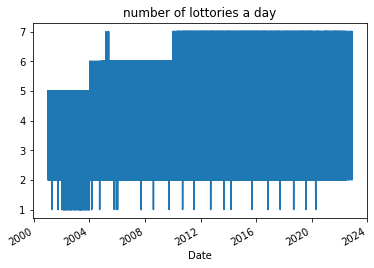

In [77]:
chance.groupby("Date").lottoryNumber.count().plot(kind="line",title="number of lottories a day")

In [78]:
chance.Date = chance.Date + pd.to_timedelta(chance.lottoryNumber,unit="microsecond")

In [79]:
possible_result = ["7","8","9","10","J","Q","K","A"]
possible_result_int = list(range(7,15))
guess_columns = ["Spades",	"Diamonds",	"Hearts"	,"Clubs"]
numbric_mapping = {"Q":12,"J":11,"K":13,"A":14}

In [80]:
all_possible = pd.DataFrame(list(product(possible_result, possible_result,possible_result,possible_result)), columns=guess_columns)
all_possible.head()

,Spades,Diamonds,Hearts,Clubs
0,7,7,7,7
1,7,7,7,8
2,7,7,7,9
3,7,7,7,10
4,7,7,7,J


In [81]:
chance.shape[0]/len(all_possible)

9.480712890625

In [82]:
chance[guess_columns].nunique()
# seems like all the type of card come up in the results which is good.

Spades      8
Diamonds    8
Hearts      8
Clubs       8
dtype: int64

In [83]:
number_of_sample = chance.shape[0]
expected_value = number_of_sample/len(possible_result)
expected = np.repeat(expected_value,repeats=len(possible_result))

In [84]:
from scipy.stats import chisquare

def get_p_value(series,possible_result):
    expected_value = series.shape[0]/len(possible_result)
    expected = np.repeat(expected_value,repeats=len(possible_result))

    counts = series.value_counts().reindex(possible_result,fill_value=0)
    stat,p_value = chisquare(f_obs=counts[possible_result],f_exp=expected)
    return p_value

In [85]:
assert chisquare(f_obs=expected,f_exp=expected)[1] == 1, "we don't understand chi-square"
assert chisquare(f_obs=[number_of_sample,0,0,0,0,0,0,0],f_exp=expected)[1] == 0, "we don't understand chi-square"

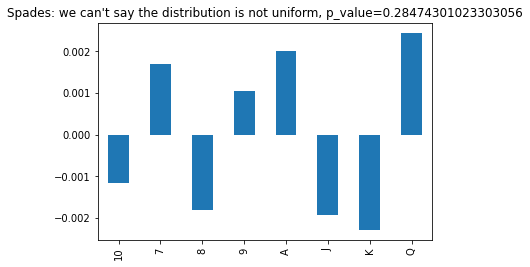

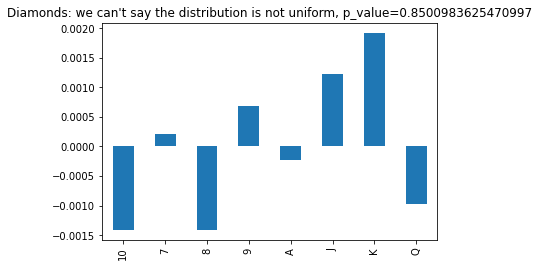

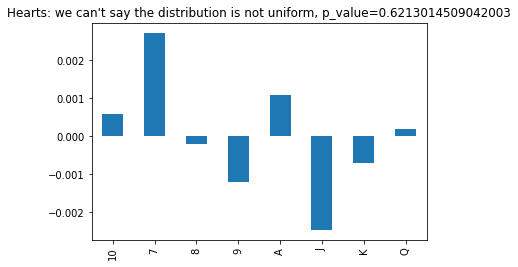

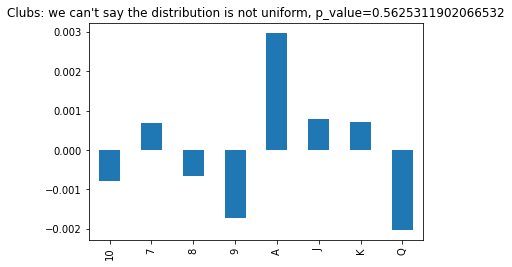

In [106]:
from matplotlib import pyplot as plt


for col in guess_columns:
    
    p_value = get_p_value(chance[col],possible_result)
    
    temp = chance[col].value_counts()
    post_fix = "" if p_value < 0.05 else "'t"
    ((temp-expected_value)/number_of_sample).sort_index().plot(kind="bar",title=f"{col}: we can{post_fix} say the distribution is not uniform, p_value={p_value}")
    plt.show()

# which means there is favorite card types for each symbol type.
# you would have expected a unifom distribution if the chance was eqale
# Spades: A,Q
# Diamonds: K,J
# Hearts: 7
# Clubs: A

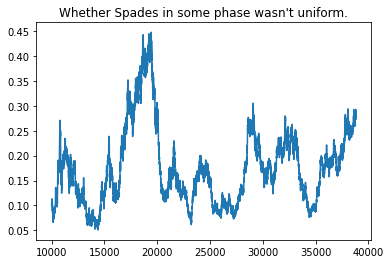

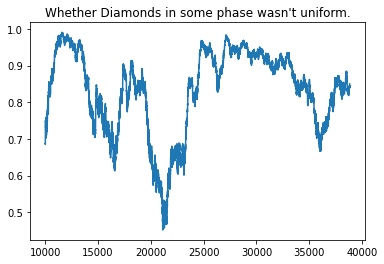

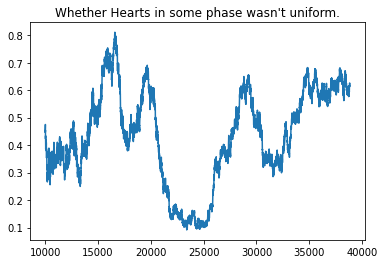

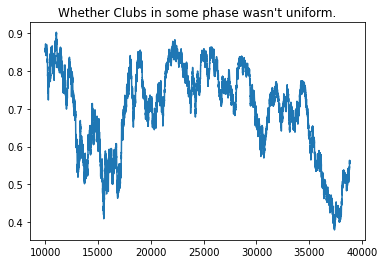

In [87]:
from matplotlib import pyplot as plt
from scipy.stats import chisquare

for col in guess_columns:
    chance[col].apply(lambda x:numbric_mapping[x] if x in numbric_mapping else int(x)).expanding(min_periods=10000).apply(lambda x:get_p_value(x,possible_result_int)).plot(title=f"Whether {col} in some phase wasn't uniform.")
    plt.show()

In [88]:
 ## Looking on tuples ##

<AxesSubplot:xlabel='Spades,Diamonds,Hearts,Clubs'>

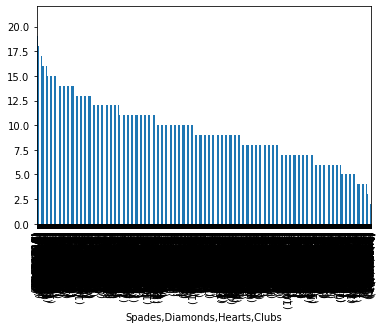

In [89]:
chance[guess_columns].value_counts().plot(kind='bar')
# you would've expect this distribution to be uniform, but no, look like they are grouped.

In [90]:
reduction_to_uni = chance[guess_columns].apply(lambda x:"".join(x) ,axis=1)
all_possible_uni = all_possible[guess_columns].apply(lambda x:"".join(x) ,axis=1)
reduced_p_value = get_p_value(reduction_to_uni,all_possible_uni)
reduced_p_value < 0.05

False

<AxesSubplot:title={'center':'mass function, most show up 10 times'}, ylabel='Density'>

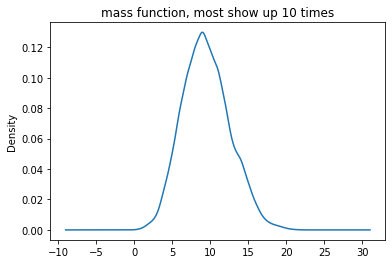

In [91]:
chance[guess_columns].value_counts().plot(kind='kde',title="mass function, most show up 10 times")
# look like the results are noramliy distributed, most appered 10 times but there are some that apeared more.

In [92]:
# fig = plt.figure()
# plt.title('Distribution of the sum hand value expected vs observed.')

# chance_numric = chance[guess_columns].applymap(lambda x:numbric_mapping[x] if x in numbric_mapping else int(x))
# chance_numric.sum(axis=1).plot(kind="density",label="sample")
# all_possible.sum(axis=1).plot(kind="density",label="expected")

# fig.legend()
# plt.show()

# # most of the types the winning sum was 40+-10, which fits the true distribution.

In [93]:

# winning amount logic
betting_prices = [5,10,25,50,70,100,250,500]
guess_columns = ["Spades","Diamonds","Hearts","Clubs"]



In [94]:
chance = chance.sort_values("lottoryNumber").reset_index(drop=True)
chance.head()

,Date,lottoryNumber,Spades,Diamonds,Hearts,Clubs
0,2001-01-01 00:00:00.006820,6820,A,10,8,Q
1,2001-01-01 00:00:00.006821,6821,10,10,7,9
2,2001-01-01 00:00:00.006822,6822,J,10,J,10
3,2001-01-01 00:00:00.006823,6823,J,K,Q,A
4,2001-02-01 00:00:00.006824,6824,K,10,9,K


In [95]:
split = int(chance.shape[0]*0.75)
train_chance = chance.iloc[:split]
test_chance = chance.iloc[split:]
print(f"{train_chance.shape[0]/chance.shape[0]} is train, {test_chance.shape[0]/chance.shape[0]} ")

0.7499806865294981 is train, 0.2500193134705019 


In [27]:
list_of_results = list()


for symbol in guess_columns:
    for possible_guess in possible_result:
        
        
        results = compute_statistics([possible_guess]*test_chance.shape[0],test_chance[symbol],name=f"Allways guess {possible_guess} {symbol}")
        
        list_of_results.append(results)
        
experiments = pd.DataFrame.from_records(data=list_of_results)
experiments.set_index("name",inplace=True)
experiments.sort_values('total_won',ascending=False)['revenue']

name
Allways guess Q Spades       -£319,400.00
Allways guess 9 Diamonds     -£337,400.00
Allways guess A Hearts       -£337,900.00
Allways guess 8 Clubs        -£341,400.00
Allways guess 7 Hearts       -£341,900.00
Allways guess Q Diamonds     -£348,400.00
Allways guess 9 Spades       -£351,400.00
Allways guess 7 Spades       -£357,400.00
Allways guess A Clubs        -£357,900.00
Allways guess 9 Hearts       -£358,900.00
Allways guess J Clubs        -£359,900.00
Allways guess 10 Clubs       -£361,900.00
Allways guess K Diamonds     -£362,400.00
Allways guess 7 Clubs        -£364,400.00
Allways guess 8 Diamonds     -£365,400.00
Allways guess 8 Spades       -£365,900.00
Allways guess A Spades       -£366,400.00
Allways guess 8 Hearts       -£369,400.00
Allways guess Q Hearts       -£369,400.00
Allways guess J Diamonds     -£371,400.00
Allways guess A Diamonds     -£371,900.00
Allways guess 10 Diamonds    -£372,400.00
Allways guess Q Clubs        -£372,900.00
Allways guess K Hearts       

In [104]:
train_chance.to_csv("train_chance.csv")
test_chance.to_csv("test_chance.csv")

In [32]:
# from tsfresh import extract_features
# extracted_features = extract_features(spades_chance, column_id="id", column_sort="Date")

# from tsfresh.utilities.dataframe_functions import impute

# impute(extracted_features)

In [110]:
import papermill as pm

pm.execute_notebook(
   'chance_model_for_type.ipynb',
   'chance_model_for_type_Spades_nn.ipynb',
   parameters = dict(card_type="Spades", model="nn")
)

pm.execute_notebook(
   'chance_model_for_type.ipynb',
   'chance_model_for_type_Diamonds_nn.ipynb',
   parameters = dict(card_type="Diamonds", model="nn")
)

pm.execute_notebook(
   'chance_model_for_type.ipynb',
   'chance_model_for_type_Hearts_nn.ipynb',
   parameters = dict(card_type="Hearts", model="nn")
)
pm.execute_notebook(
   'chance_model_for_type.ipynb',
   'chance_model_for_type_Clubs_nn.ipynb',
   parameters = dict(card_type="Clubs", model="nn")
)

Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/24 [00:00<?, ?cell/s]

2022-08-12 22:11:50.511691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/24 [00:00<?, ?cell/s]

2022-08-12 22:14:41.286941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/24 [00:00<?, ?cell/s]

2022-08-12 22:17:40.877609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/24 [00:00<?, ?cell/s]

2022-08-12 22:20:34.390622: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'cells': [{'cell_type': 'code',
   'execution_count': 1,
   'id': '6bd0737a',
   'metadata': {'execution': {'iopub.status.busy': '2022-08-12T19:18:13.543139Z',
     'iopub.execute_input': '2022-08-12T19:18:13.543439Z',
     'iopub.status.idle': '2022-08-12T19:18:13.551040Z',
     'shell.execute_reply': '2022-08-12T19:18:13.550444Z'},
    'papermill': {'exception': False,
     'start_time': '2022-08-12T19:18:13.519377',
     'end_time': '2022-08-12T19:18:13.554320',
     'duration': 0.034943,
     'status': 'completed'},
    'tags': ['parameters']},
   'outputs': [],
   'source': 'card_type = "Spades"\nmodel = "lstm"'},
  {'id': '048cdb6d',
   'cell_type': 'code',
   'metadata': {'tags': ['injected-parameters'],
    'papermill': {'exception': False,
     'start_time': '2022-08-12T19:18:13.590708',
     'end_time': '2022-08-12T19:18:13.622125',
     'duration': 0.031417,
     'status': 'completed'},
    'execution': {'iopub.status.busy': '2022-08-12T19:18:13.616632Z',
     'iopub.execut

In [3]:
import papermill as pm

pm.execute_notebook(
   'chance_model_for_all.ipynb',
   'chance_model_for_all_Spades.ipynb',
   parameters = dict(card_type="Spades", model="lstm")
)

pm.execute_notebook(
   'chance_model_for_all.ipynb',
   'chance_model_for_all_Diamonds.ipynb',
   parameters = dict(card_type="Diamonds", model="lstm")
)

pm.execute_notebook(
   'chance_model_for_all.ipynb',
   'chance_model_for_all_Hearts.ipynb',
   parameters = dict(card_type="Hearts", model="lstm")
)
pm.execute_notebook(
   'chance_model_for_all.ipynb',
   'chance_model_for_all_Clubs.ipynb',
   parameters = dict(card_type="Clubs", model="lstm")
)

Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

2022-08-14 21:42:04.212528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

2022-08-14 22:34:43.516948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

2022-08-14 23:24:07.550620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Black is not installed, parameters wont be formatted


Executing:   0%|          | 0/28 [00:00<?, ?cell/s]

2022-08-15 00:23:29.372147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


{'cells': [{'cell_type': 'code',
   'execution_count': 1,
   'id': '6bd0737a',
   'metadata': {'execution': {'iopub.status.busy': '2022-08-14T21:19:29.270190Z',
     'iopub.execute_input': '2022-08-14T21:19:29.270639Z',
     'shell.execute_reply': '2022-08-14T21:19:29.277064Z',
     'iopub.status.idle': '2022-08-14T21:19:29.277780Z'},
    'papermill': {'exception': False,
     'start_time': '2022-08-14T21:19:29.242849',
     'end_time': '2022-08-14T21:19:29.279849',
     'duration': 0.037,
     'status': 'completed'},
    'tags': ['parameters']},
   'outputs': [],
   'source': 'model = "lstm"\ncard_type = "Diamonds"'},
  {'id': '5bbbc779',
   'cell_type': 'code',
   'metadata': {'tags': ['injected-parameters'],
    'papermill': {'exception': False,
     'start_time': '2022-08-14T21:19:29.302210',
     'end_time': '2022-08-14T21:19:29.328672',
     'duration': 0.026462,
     'status': 'completed'},
    'execution': {'iopub.status.busy': '2022-08-14T21:19:29.323999Z',
     'iopub.execute